In [1]:
import pandas as np
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from Functions.UNSW_DF import *

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [15]:
df = pd.read_csv("Analysis_DT/DT_results.csv")
df = df.drop(["min_SL", "min_SS", "max_depth", "max_features", "ccp_alpha", "runtime(s)"], axis=1)

In [16]:
df

,criterion,train_acc,test_acc,F1,precision,recall
0,entropy,0.96417,0.87257,0.89365,0.82674,0.97233
1,entropy,0.96521,0.86949,0.89170,0.82090,0.97586
2,entropy,0.93407,0.82761,0.86379,0.76445,0.99280
3,entropy,0.96275,0.86825,0.89055,0.82065,0.97346
4,entropy,0.96142,0.87126,0.89294,0.82358,0.97505
5,entropy,0.96397,0.87266,0.89414,0.82439,0.97679
6,entropy,0.91949,0.76377,0.82264,0.70118,0.99499
7,gini,0.99816,0.86406,0.88571,0.82453,0.95669
8,gini,0.90438,0.77174,0.82665,0.71035,0.98848
9,gini,0.93363,0.80985,0.85266,0.74356,0.99927


In [17]:
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]

for col in columns:
    df[col] *= 100


In [18]:
df = pd.melt(df, id_vars="criterion", var_name="metric", value_name="score")

In [19]:
df

,criterion,metric,score
0,entropy,train_acc,96.417
1,entropy,train_acc,96.521
2,entropy,train_acc,93.407
3,entropy,train_acc,96.275
4,entropy,train_acc,96.142
...,...,...,...
65,gini,recall,99.927
66,gini,recall,97.586
67,gini,recall,97.581
68,gini,recall,97.617


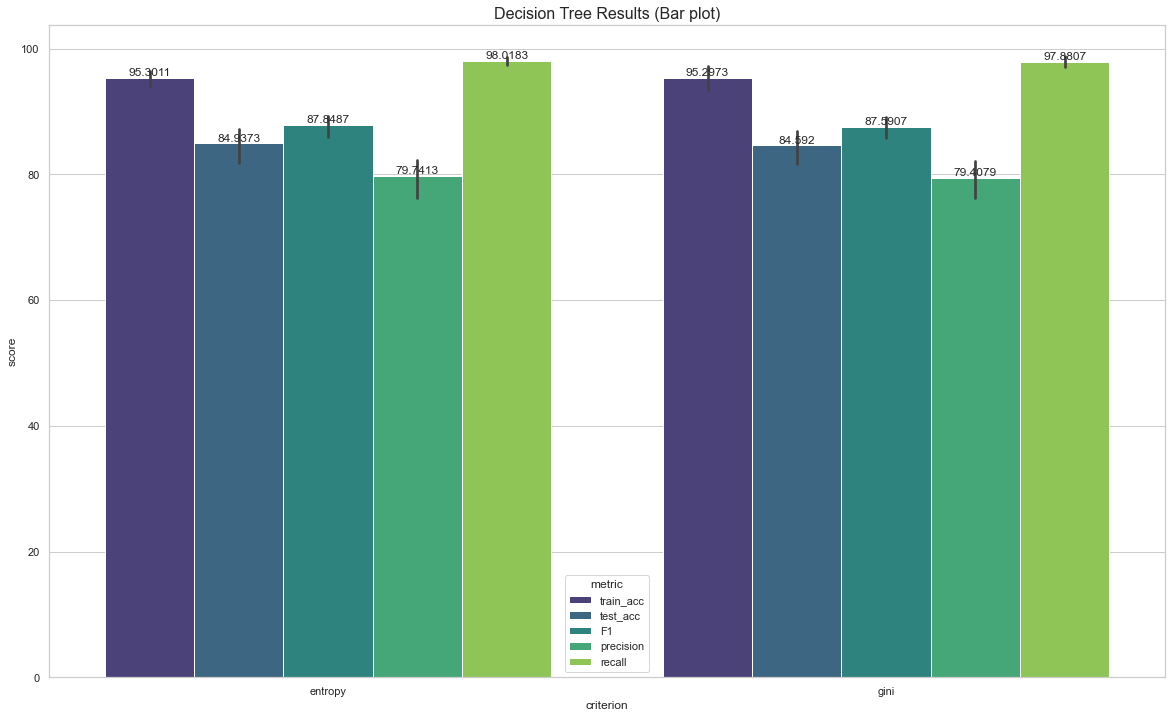

In [20]:
sns.set(rc={"figure.figsize":(20, 12), 'axes.facecolor':'white',})
sns.set_style("whitegrid")
ax = sns.barplot(x='criterion', y='score', hue='metric', data=df, palette="viridis")
plt.title("Decision Tree Results (Bar plot)", size=16)

for container in ax.containers:
    ax.bar_label(container)
ax.figure.savefig("Analysis_DT/DT_Results.png", dpi=400)

## Distplot

In [11]:
df_dist = pd.read_csv("Analysis_DT/DT_results.csv")
df_dist = df_dist.drop(["min_SL", "min_SS", "max_depth", "max_features", "ccp_alpha"], axis=1)
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]
for col in columns:
    df_dist[col] *= 100


C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

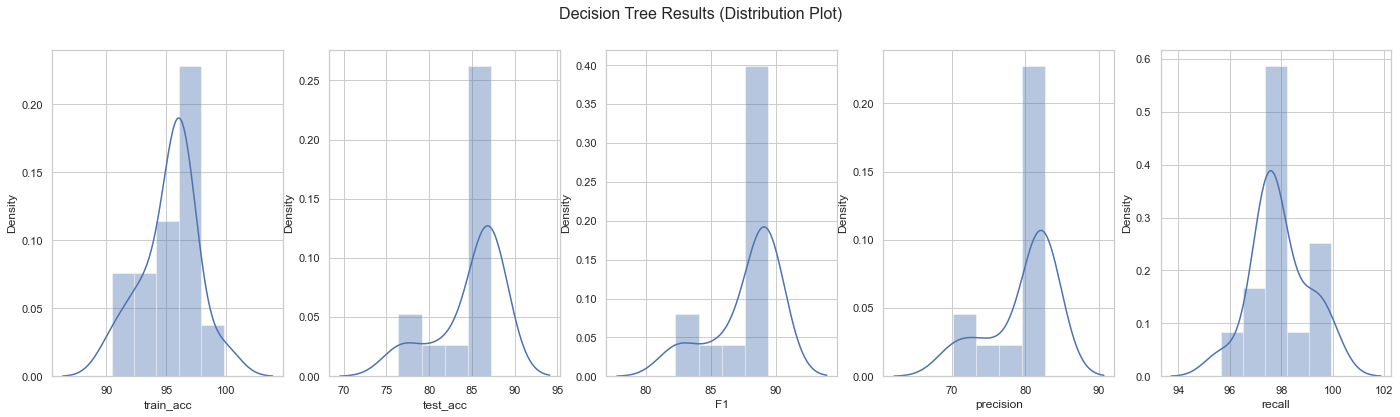

In [12]:
sns.set(rc={"figure.figsize":(24, 6), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=5, nrows=1)
ax=sns.distplot(df_dist["train_acc"], ax=axs[0])
ax=sns.distplot(df_dist['test_acc'], ax=axs[1])
ax=sns.distplot(df_dist['F1'], ax=axs[2])
ax=sns.distplot(df_dist['precision'], ax=axs[3])
ax=sns.distplot(df_dist['recall'], ax=axs[4])
fig.suptitle("Decision Tree Results (Distribution Plot)", size=16)

ax.figure.savefig("Analysis_DT/DT_Distplot.png", dpi=400)

### Jointplot

In [13]:
df_reg = pd.read_csv("Analysis_DT/DT_results.csv")
df_reg = df_reg.drop(["min_SL", "min_SS", "max_depth", "max_features", "ccp_alpha"], axis=1)
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]
for col in columns:
    df_reg[col] *= 100


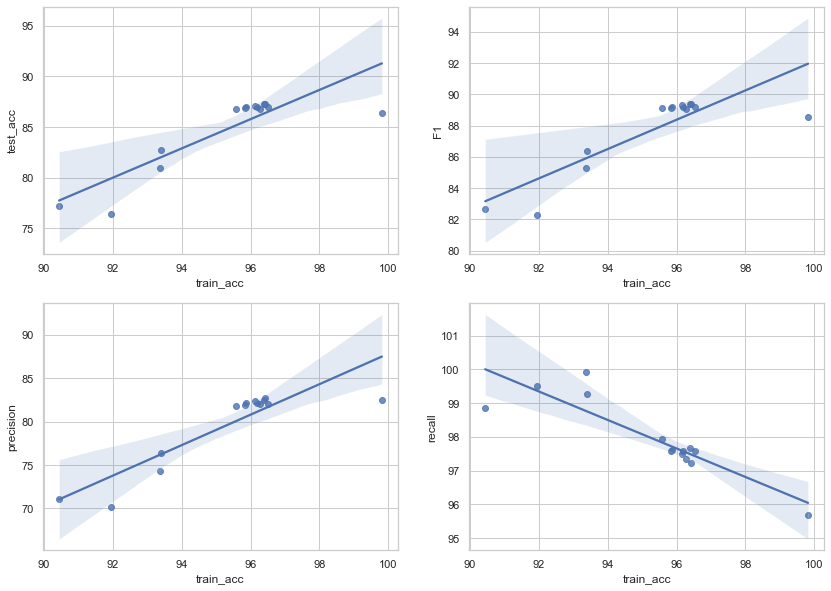

In [14]:
sns.set(rc={"figure.figsize":(14, 10), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=2, nrows=2)
ax=sns.regplot(x='train_acc', y='test_acc', data=df_reg, ax=axs[0, 0])
ax=sns.regplot(x='train_acc', y='F1', data=df_reg, ax=axs[0,1])
ax=sns.regplot(x='train_acc', y='precision', data=df_reg, ax=axs[1,0])
ax=sns.regplot(x='train_acc', y='recall', data=df_reg, ax=axs[1, 1])

#fig.suptitle("Decision Tree Results (Regression Plot)", size=16)
ax.figure.savefig("Analysis_DT/DT_regplot.png", dpi=400)